Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens
Ian Aragão, Lucas Rosa e Lucas Borba

# Exercício Avalitivo de Processamento Morfológico

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Processamento Morfológico
#### Obs: Utilize imagens em preto e branco.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math

In [ ]:
def add_padding(img, padding_height, padding_width):
    h, w = img.shape

    padded_img = np.zeros((h + padding_height * 2, w + padding_width * 2))
    padded_img[padding_height : h + padding_height, padding_width : w + padding_width] = img

    return padded_img

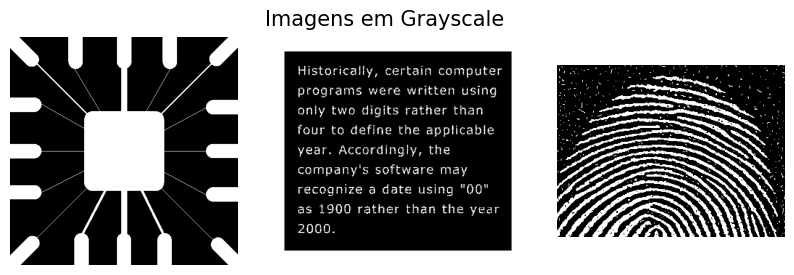

In [ ]:
# Carregar Imagens

img1 = cv2.imread("Fig0905(a)(wirebond-mask).tif")
img2 = cv2.imread("Fig0907(a)(text_gaps_1_and_2_pixels).tif")
img3 = cv2.imread("Fig0911(a)(noisy_fingerprint).tif")

img1_grayscale = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_grayscale = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3_grayscale = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

imgs = [
    img1_grayscale,
    img2_grayscale,
    img3_grayscale
]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
fig.suptitle("Imagens em Grayscale", y=0.85, fontsize=15)

for i, img in enumerate(imgs):
    axs[i].imshow(img, cmap="gray", vmin=0, vmax=255)
    axs[i].axis("off")

### Erosão e Dilatação

1. Implemente a sua própria versão da erosão em formato de função, com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma) e aplique o algoritmos na na figura ImagensMorfologia/Fig0905(a)(wirebond-mask)
2. Implemente a sua própria versão da dilatação em formato de função, com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma) e aplique o algoritmos na na figura ImagensMorfologia/Fig0907(a)(text_gaps_1_and_2_pixels)
4. Relate as observações visíveis nas imagens de saída com os processamentos aplicados, descrevendo o comportamento visual em relação as bordas, junção, perda de informação e mlhoria na qualidade visual.
5. Aplique o seu algoritmo de detecção de borda (roberts ou sobel) a imagem ImagensMorfologia/Fig0905(a)(wirebond-mask) antes e depois de utilizar a dilatação/erosão e relate os resultados.

#### Dicas
 - Você pode adicionar ruído nas imagens usando a função random_noise: `from skimage.util import random_noise`. Cuidado com o retorno da função, talvez seja necessário regularizar a mesma novamente para o intervalo de 0 à 255. O ruído pode ser intensificado ou excluído com processamento morfológico.

#### Erosão

In [ ]:
def erosion_conv(img, kernel, floatOut=False):
    # Get dimensions of the kernel
    k_height, k_width = kernel.shape

    # Get dimensions of the image
    img_height, img_width = img.shape

    # Calculate padding required
    pad_height = k_height // 2
    pad_width = k_width // 2

    # Create a padded version of the image to handle edges
    img = add_padding(img, pad_height, pad_width)

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)

    # Perform convolution

    # print(f"Height: {img_height}")
    # print(f"Width: {img_width}")

    # Iterate only on original image
    for i in range(pad_height, img_height + pad_height):
        for j in range(pad_width, img_width + pad_width):
            accumulation = 0
            isContained = True
            for u in range(k_height):
                for v in range(k_width):
                    kernel_pixel = kernel[u,v]
                    img_pixel = img[i - pad_height + u, j - pad_width + v]
                    if kernel_pixel == 1 and img_pixel != 255:
                        isContained = False
                        break
                if not isContained:
                    break
            output[i-pad_height,j-pad_width] = img[i-pad_height,j-pad_width] if isContained else 0
    if(floatOut):
      return output
    else:
      return np.array(output, dtype=np.uint8)

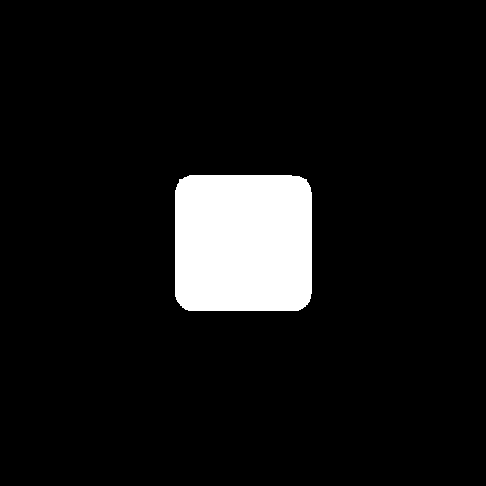

In [ ]:
kernel = np.ones((35, 35), dtype=np.uint8)
erosion_result = erosion_conv(img1_grayscale, kernel)
cv2_imshow(erosion_result)

A erosão provocou o afinamento das estruturas brancas na imagem binária, reduzindo a espessura dos fios e eliminando pequenas regiões isoladas. Esse efeito é esperado, pois a erosão substitui cada pixel pelo mínimo local, removendo pixels de borda e reduzindo as áreas claras.
Como o kernel utilizado foi relativamente grande (35×35), o resultado mostrou grande perda de detalhes finos, e partes das conexões mais estreitas com as bordas foram completamente apagadas.
Observamos uma redução drástica da espessura das linhas brancas, a separação de regiões que antes estavam conectadas e eliminação de ruídos claros pequenos.

A erosão é útil para remover ruídos pequenos e separar objetos próximos, mas com kernels grandes, há perda de informação significativa.

#### Dilatação

In [ ]:
def dilation_conv(img, kernel, floatOut=False):
    # Get dimensions of the kernel
    k_height, k_width = kernel.shape

    # Get dimensions of the image
    img_height, img_width = img.shape

    # Calculate padding required
    pad_height = k_height // 2
    pad_width = k_width // 2

    # Create a padded version of the image to handle edges
    img = add_padding(img, pad_height, pad_width)

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)

    # Perform convolution

    # print(f"Height: {img_height}")
    # print(f"Width: {img_width}")

    # Iterate only on original image
    for i in range(pad_height, img_height + pad_height):
        for j in range(pad_width, img_width + pad_width):
            if(img[i, j] != 255):
              continue

            for u in range(-k_height // 2, k_height // 2):
                for v in range(-k_width // 2, k_width // 2):
                    kernel_pixel = kernel[u + k_height // 2, v + k_width // 2]

                    out_i = i + u - k_height // 2 + 1
                    out_j = j + v - k_width // 2 + 1

                    if out_i < img_height and out_j < img_width and (kernel_pixel == 1 or img[out_i, out_j] == 255):
                      output[out_i, out_j] = 255
    if(floatOut):
      return output
    else:
      return np.array(output, dtype=np.uint8)

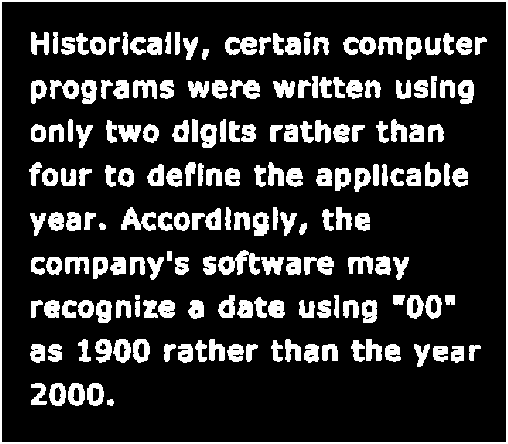

In [ ]:
kernel = np.ones((3,3), dtype=np.uint8)
dilation_result = dilation_conv(img2_grayscale, kernel)
cv2_imshow(dilation_result)

A dilatação produziu o efeito oposto da erosão, expandindo as regiões brancas e fechando lacunas entre caracteres do texto. Cada pixel branco “cresceu” conforme o tamanho do kernel, preenchendo espaços pequenos entre letras e suavizando falhas.
O uso de um kernel pequeno (3×3) garantiu que o aumento fosse controlado, sem borrar demasiadamente as formas.

Dentre os efeitos visuais observados, estão:


*   As letras tornaram-se ligeiramente mais espessas;
*   Pequenos espaços entre caracteres foram preenchidos;
*   Ruídos escuros isolados foram parcialmente suprimidos.


A dilatação é adequada para reconectar estruturas fragmentadas e fortalecer bordas, mas seu uso excessivo pode causar perda da definição original das formas.

#### Detecção de Bordas com Sobel

In [ ]:
def conv2d(img, kernel, padding=True, floatOut=False):
    # Get dimensions of the kernel
    k_height, k_width = kernel.shape

    # Get dimensions of the image
    img_height, img_width = img.shape

    # Calculate padding required
    pad_height = k_height // 2
    pad_width = k_width // 2

    # Create a padded version of the image to handle edges
    if padding:
        img = add_padding(img, pad_height, pad_width)

    # Initialize an output image with zeros
    output = np.zeros((img_height, img_width), dtype=float)

    # Perform convolution

    # print(f"Height: {img_height}")
    # print(f"Width: {img_width}")

    # Iterate only on original image
    for i in range(pad_height, img_height + pad_height):
        for j in range(pad_width, img_width + pad_width):
            accumulation = 0
            for u in range(k_height):
                for v in range(k_width):
                    # Accumulate pixel and neighboors, multiplying kernel entry
                    # with the corresponding pixel entry
                    accumulation += kernel[u, v] * img[i - pad_height + u, j - pad_width + v]
            output[i-pad_height,j-pad_width] = accumulation
    if(floatOut):
      return output
    else:
      return np.array(output, dtype=np.uint8)

In [ ]:
def sobel_create_apply(img):
    # Sobel horizontal e vertical
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])

    gx = conv2d(img, Kx, padding=True, floatOut=True)
    gy = conv2d(img, Ky, padding=True, floatOut=True)

    # Magnitude do gradiente
    magnitude = np.sqrt(gx**2 + gy**2)
    magnitude = np.clip(magnitude, 0, 255)
    return magnitude.astype(np.uint8)

In [ ]:
sobel_img1_grayscale = sobel_create_apply(img1_grayscale)
sobel_img1_erosion = sobel_create_apply(erosion_result)

sobel_img2_grayscale = sobel_create_apply(img2_grayscale)
sobel_img2_dilation = sobel_create_apply(dilation_result)

(np.float64(-0.5), np.float64(507.5), np.float64(443.5), np.float64(-0.5))

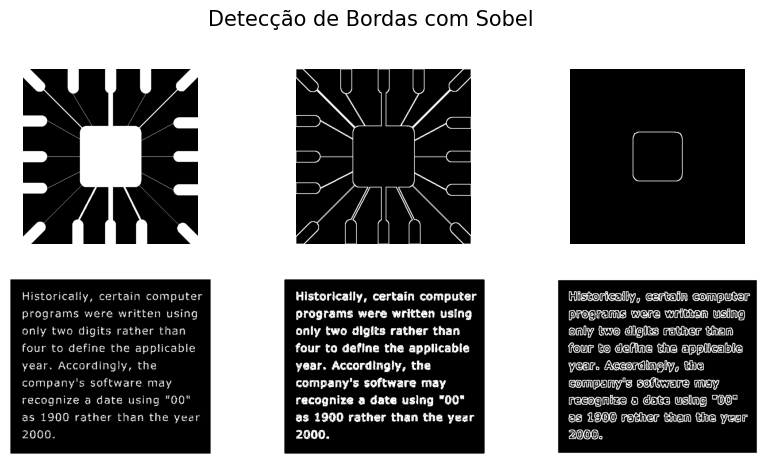

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
fig.suptitle("Detecção de Bordas com Sobel", y=1, fontsize=15)

axs[0][0].imshow(img1_grayscale, cmap="gray", vmin=0, vmax=255)
axs[0][0].axis("off")

axs[0][1].imshow(sobel_img1_grayscale, cmap="gray", vmin=0, vmax=255)
axs[0][1].axis("off")

axs[0][2].imshow(sobel_img1_erosion, cmap="gray", vmin=0, vmax=255)
axs[0][2].axis("off")

axs[1][0].imshow(img2_grayscale, cmap="gray", vmin=0, vmax=255)
axs[1][0].axis("off")

axs[1][1].imshow(sobel_img2_grayscale, cmap="gray", vmin=0, vmax=255)
axs[1][1].axis("off")

axs[1][2].imshow(sobel_img2_dilation, cmap="gray", vmin=0, vmax=255)
axs[1][2].axis("off")

O operador Sobel foi usado para realçar transições de intensidade (bordas).
Comparando as imagens antes e depois dos processamentos morfológicos:

Antes da erosão/dilatação: as bordas aparecem finas e fragmentadas, com presença de ruído e irregularidades.

Após a erosão: as bordas tornam-se mais contínuas, porém menos intensas, já que parte das regiões claras foi removida.

Após a dilatação: as bordas aparecem mais espessas e definidas, pois as áreas brancas foram expandidas, aumentando o contraste nas bordas.

A aplicação então dos filtros morfológicos antes da detecção de bordas melhora a consistência dos contornos, reduzindo falsos positivos e suavizando o ruído.

### Abertura e Fechamento

5. Implemente a sua versão do algoritmo de abertura em forma de função com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma)
6. Implemente a sua versão do algoritmo de fechamento em forma de função com capacidade de trabalhar com diferentes elementos estruturantes (tamanho e forma)
7. Aplique o processamento indicado na image abaixo usando a figura ImagensMorfologia/Fig0911(a)(noisy_fingerprint)

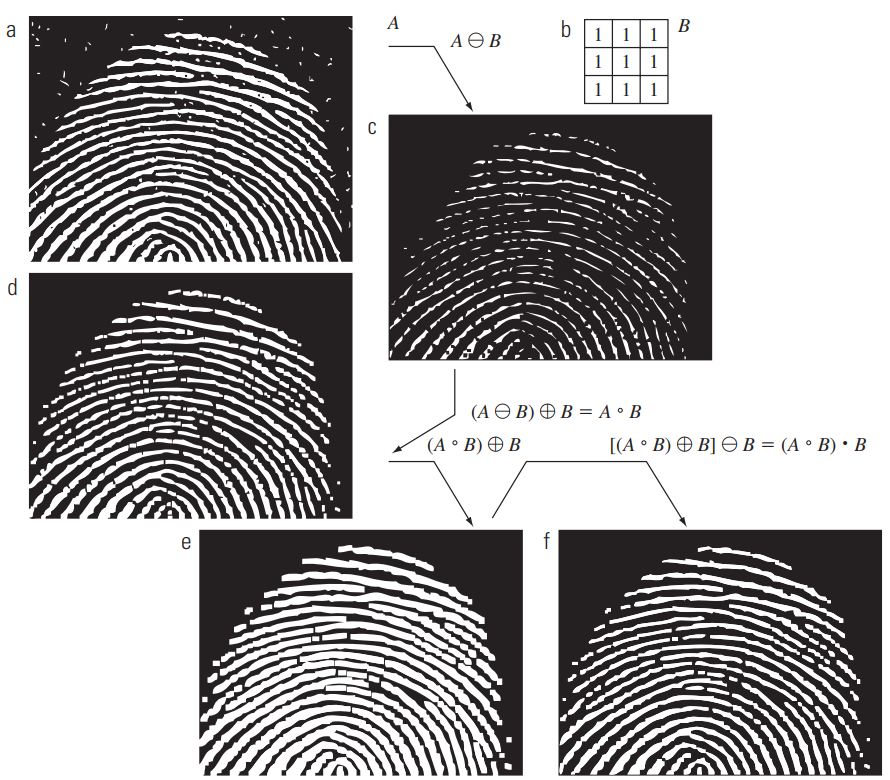

In [ ]:
def opening(img, kernel):
  return dilatation_conv(erosion_conv(img, kernel), kernel)


def closing(img, kernel):
  return erosion_conv(dilatation_conv(img, kernel), kernel)

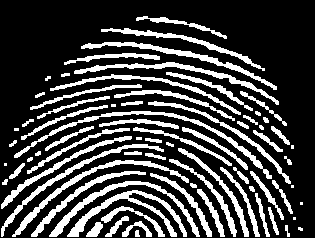

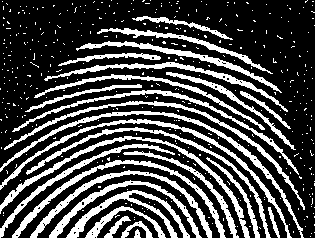

In [ ]:
kernel = np.ones((3,3), dtype=np.uint8)




# Fill the center row and center column with ones
open = opening(img3_grayscale, kernel)
close = closing(open, kernel)


cv2_imshow(close)
cv2_imshow(img3_grayscale)

### Abertura

A operação de abertura teve como principal efeito a remoção dos pequenos pontos brancos isolados presentes na imagem, que caracterizam o ruído do tipo sal. Esse processo manteve as principais estruturas da impressão digital praticamente intactas. Na primeira etapa, a erosão eliminou pixels dispersos e afinou as linhas das cristas, enquanto a dilatação subsequente restaurou parte da espessura original, resultando em uma imagem mais uniforme e com melhor contraste. De modo geral, a abertura foi eficaz para limpar o ruído claro sem comprometer as formas maiores, tornando a textura da digital mais nítida e suave.

### Fechamento

O fechamento teve como objetivo preencher pequenas falhas escuras nas linhas e suavizar descontinuidades na impressão digital. A dilatação inicial expandiu as regiões brancas, cobrindo pequenas lacunas, enquanto a erosão posterior ajustou novamente as bordas, preservando o formato original das cristas. O resultado foi uma imagem visualmente mais contínua, com as linhas melhor definidas e uma aparência mais limpa e homogênea. A aplicação conjunta da abertura e do fechamento produziu um equilíbrio entre a remoção de ruídos e a reconstrução das estruturas principais, aprimorando de forma significativa a qualidade visual da imagem.